In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dta=sm.datasets.fair.load_pandas().data

In [3]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [4]:
dta['affair'] = (dta.affairs >0).astype(int)

In [5]:
#Checking the distribution of dependent feature
dta.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

**Seems to be an imbalanced dataset as one category has double the records of other**

In [6]:
#Checking for NULL Values
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.5 KB


**NULL values are not present in above dataset**

In [7]:
#Getting a summary of data
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


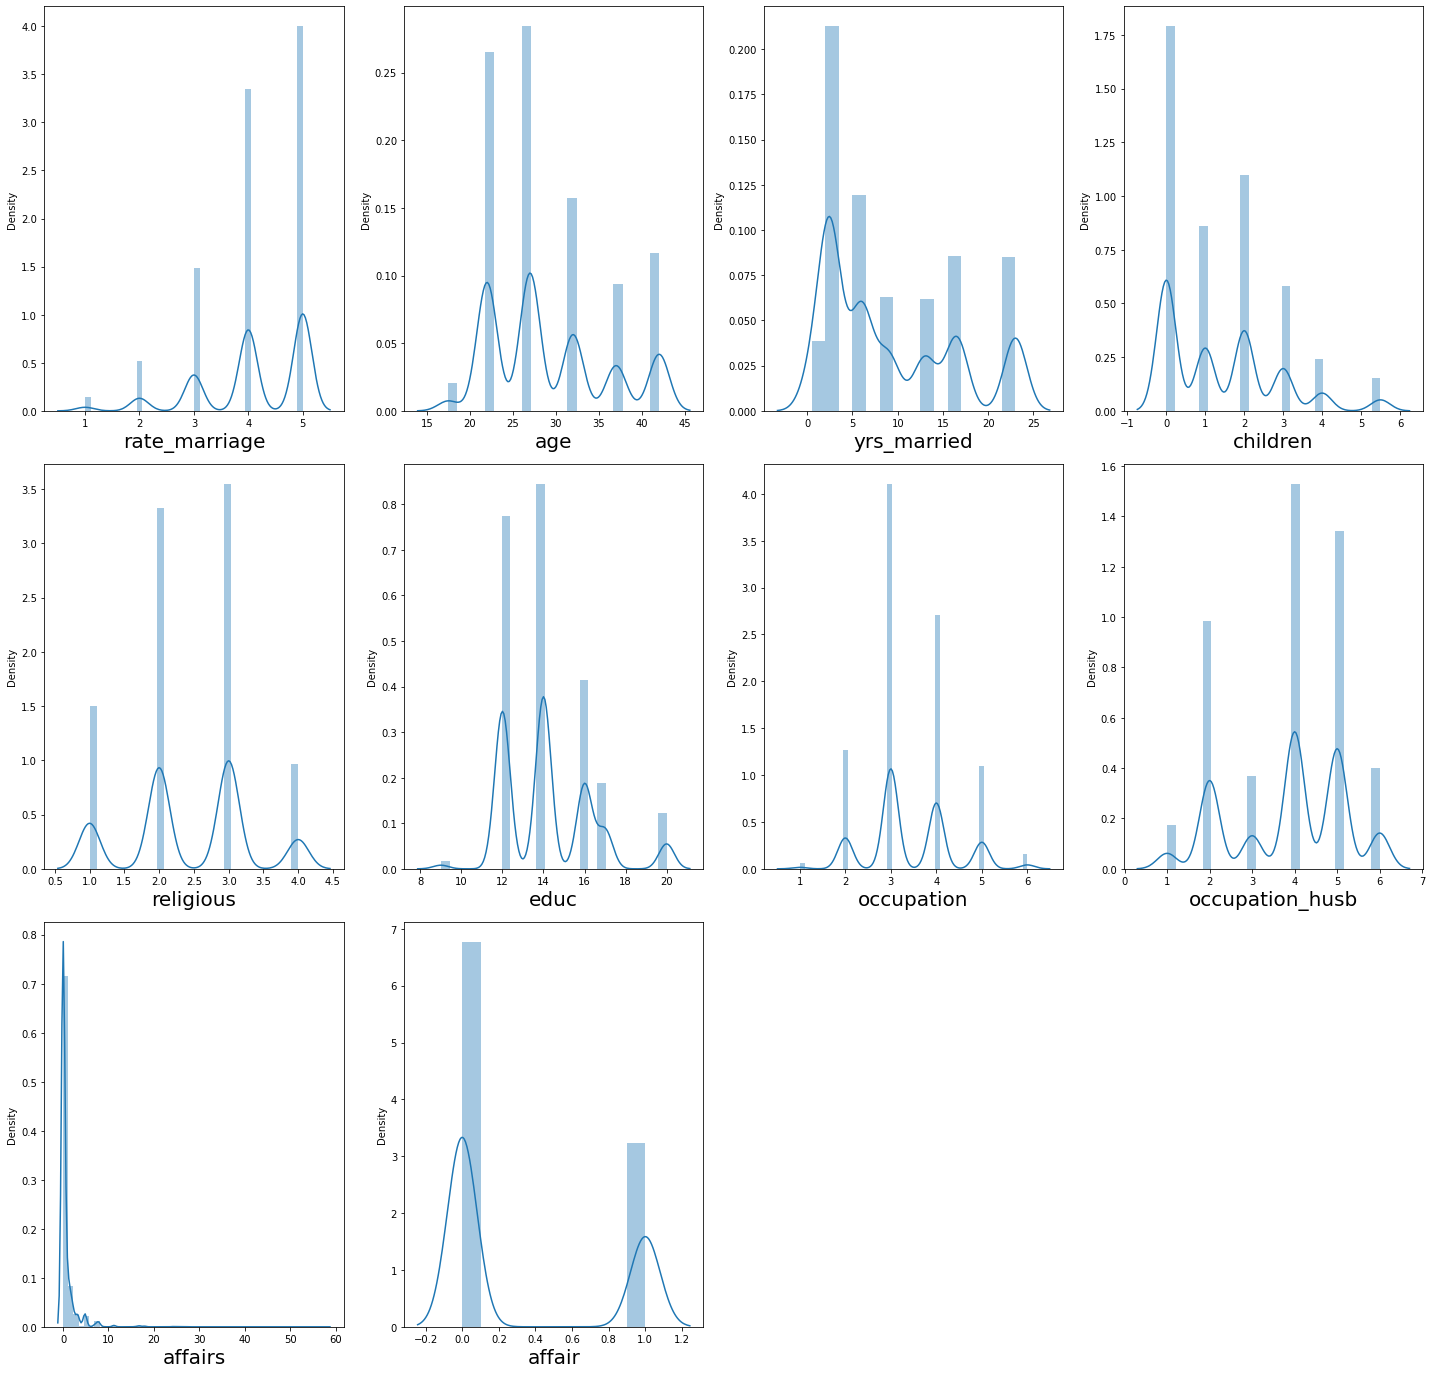

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(dta[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

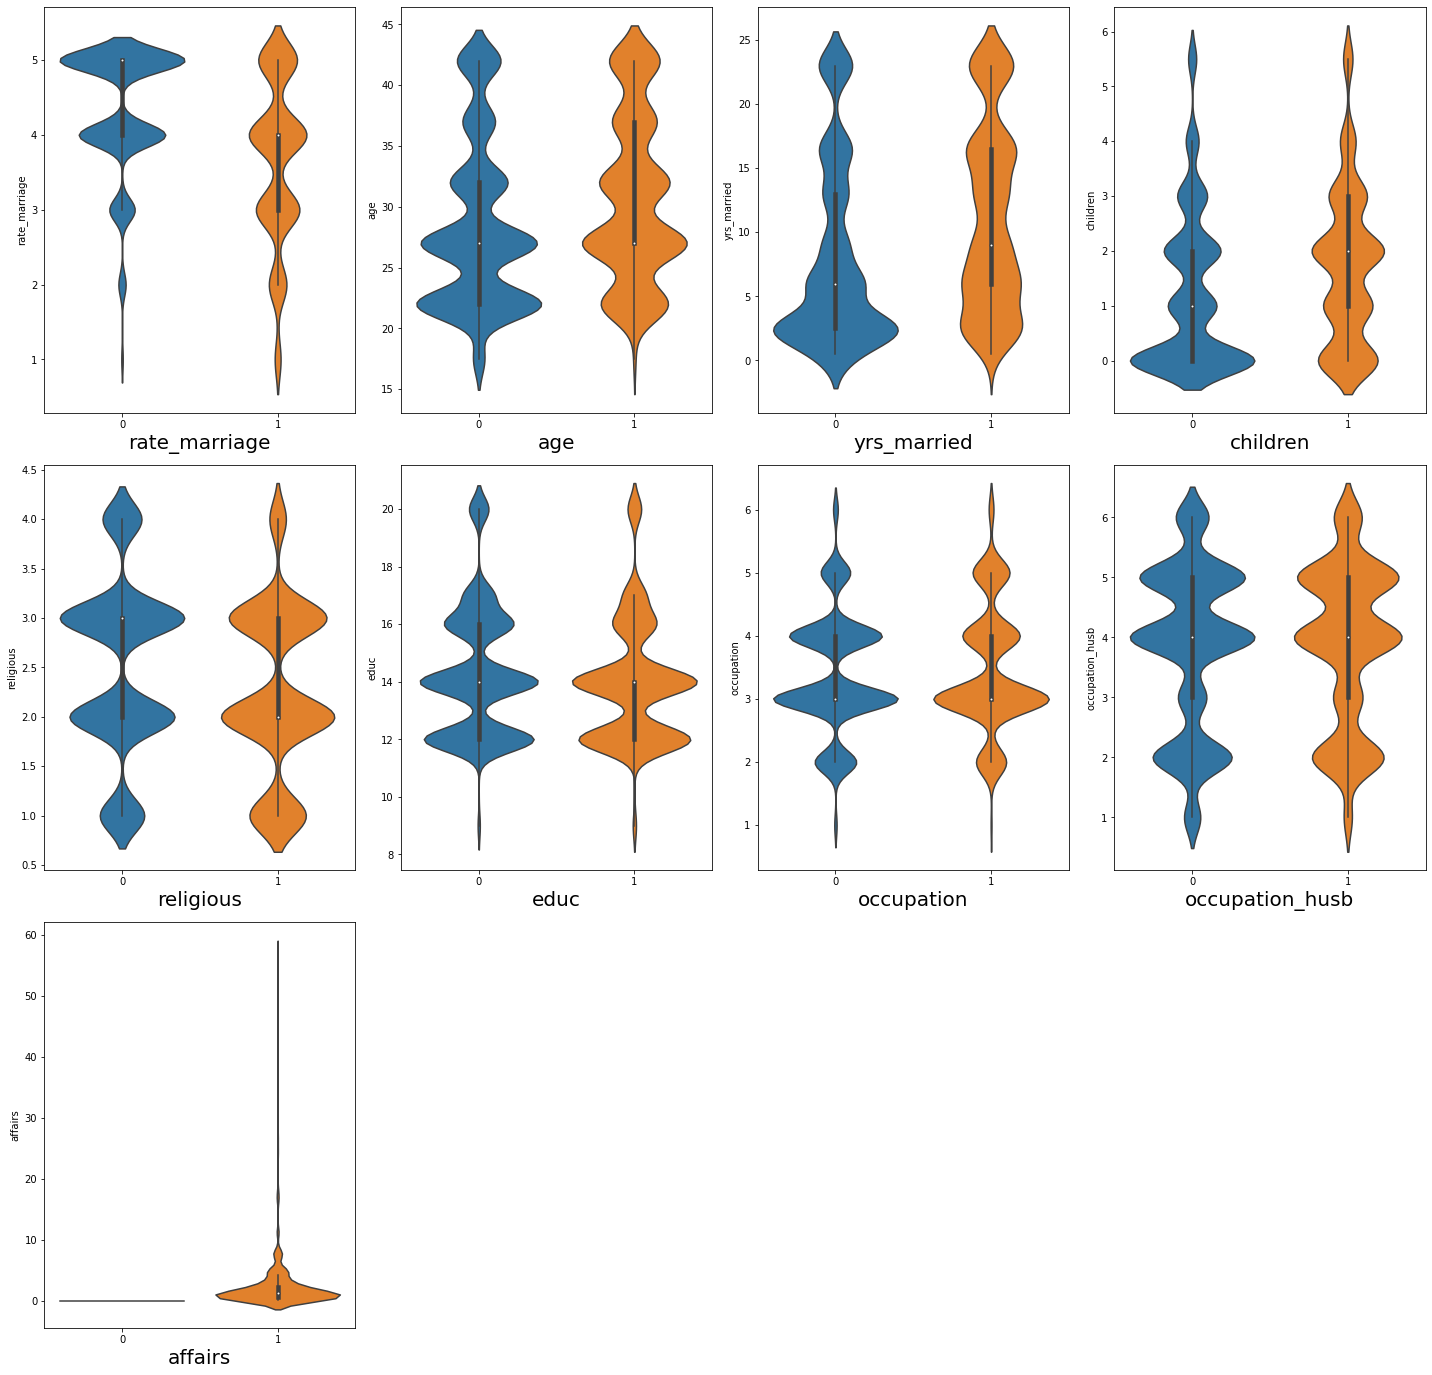

In [9]:
# let's see how data is distributed for every column and each category.
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta.drop(columns=['affair']):
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.violinplot(y=column,x='affair',data=dta)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Some of the attributes(rate_marriage,age,yrs_married,children,education) give us an idea how we can distribute the data**

In [10]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

In [11]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [12]:
#Flattening the array
y=np.ravel(y)

In [13]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [14]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,NaN,Intercept
1,19.340780,occ_2
2,39.335618,occ_3
3,32.931910,occ_4
4,17.057165,occ_5
5,3.697959,occ_6
6,5.566292,occ_husb_2
7,2.991070,occ_husb_3
8,6.930281,occ_husb_4
9,6.577077,occ_husb_5


In [18]:
from sklearn.decomposition import PCA

In [19]:
pca=PCA(n_components=16)
pca.fit(X_scaled)
X_scaled=pca.transform(X_scaled)

In [20]:
'''vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif'''

'vif = pd.DataFrame()\nvif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]\nvif["Features"] = X.columns\n\n#let\'s check the values\nvif'

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.80, random_state=355)

In [23]:
#Creating a logistic regression model
model=LogisticRegression()
model

LogisticRegression()

In [24]:
model.fit(X_train,y_train)

LogisticRegression()

In [25]:
print(model.intercept_)
print(model.coef_)

[-0.86820103]
[[ 0.28642491 -0.17805779 -0.09754933  0.01492019  0.04037216  0.16600263
   0.02201041  0.67325349  0.22110419  0.19475182 -0.07096377  0.03170189
   0.01096669 -0.80204922 -0.1783994  -0.4970327 ]]


In [26]:
pd.DataFrame(list(zip(X.columns,np.transpose(model.coef_))))

,0,1
0,Intercept,[0.28642491290349936]
1,occ_2,[-0.1780577903713062]
2,occ_3,[-0.09754933236456209]
3,occ_4,[0.014920192101074918]
4,occ_5,[0.04037215803868455]
5,occ_6,[0.166002627277531]
6,occ_husb_2,[0.022010408780076218]
7,occ_husb_3,[0.6732534932736467]
8,occ_husb_4,[0.2211041855874721]
9,occ_husb_5,[0.19475181622036805]


In [27]:
y_pred=model.predict(X_test)

In [28]:
print(model)

LogisticRegression()


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [30]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7189952904238619

In [31]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[773,  90],
       [268, 143]], dtype=int64)

In [32]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [33]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7189952904238619

In [34]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.895712630359212

In [35]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7425552353506244

In [36]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8119747899159663

In [37]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6218222519192653

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

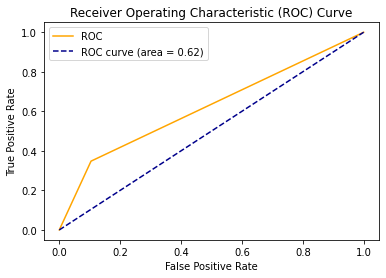

In [39]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [40]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.72213501, 0.69701727, 0.73469388, 0.70800628, 0.71585557,
        0.72841444, 0.72798742, 0.70440252, 0.75      , 0.75628931]),
 0.724480169426261)